**Task 7: Baseline Simulation= Fixed velocity**

This notebook simulates the test case 1: 	Test the case where the 1D model domain extends to 20m downstream (with a 20cm spatial resolution) of the point that the pollutant enters the river and model how the pollutant moves over the 5 minutes after it enters the river (with a temporal resolution of 10s). Assume that the initial concentration of the pollutant is 250 µg/m³ at x=0 and 0 elsewhere. Assume that U = 0.1ms-1

In [53]:
#Setting up parameters as required
L = 20.0
T = 5.0 * 60.0
Delta_x = 0.2
Delta_t = 10.0
U = 0.1
C0 = 250.0


In [54]:
#Importing all the functions from the repository that will be needed

import numpy as np

import os
!rm -rf CNM_2025_group_13
!git clone https://github.com/liz-lewis-manchester/CNM_2025_group_13.git
if not os.path.exists('/content/CNM_2025_group_13'):
    !git clone https://github.com/liz-lewis-manchester/CNM_2025_group_13.git

import sys
sys.path.append('/content/CNM_2025_group_13')

from src.solver import storing_matrix, forward_substitution
from src.domain import setup_domain, initial_conditions
from src.boundary import apply_outflow_boundary



Cloning into 'CNM_2025_group_13'...
remote: Enumerating objects: 429, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 429 (delta 65), reused 32 (delta 32), pack-reused 318 (from 1)
Receiving objects: 100% (429/429), 155.47 KiB | 3.17 MiB/s, done.
Resolving deltas: 100% (154/154), done.


In [55]:

#running the functions to set up a grid
x_array, t_array, N_x, N_t = setup_domain(L, T, Delta_x, Delta_t)
C_current, C_next = initial_conditions(N_x, C0, start_index=0)

#running the function to compute coefficients A and B
A,B= storing_matrix(N_x, Delta_t, Delta_x, U)

#Creating a placeholder to store all the C values computed into the forward_substitution
C_history = np.zeros((N_t, N_x))
C_history[0,:]= C_current


In [56]:
#Writing a for loop to run the code and solve using forward_substitution
for n in range (1, N_t):
  F=(1/Delta_t)*C_current[1:] #Creating vector from RHS
  C_next[:] = 0.0
  C_next[0] = C0
  C_next= forward_substitution(A, B, F, C_next)
  C_current[:]=C_next[:]
  C_current = C_next.copy()
  C_history[n, :] = C_current
  apply_outflow_boundary(C_next) #applying outflow boundary


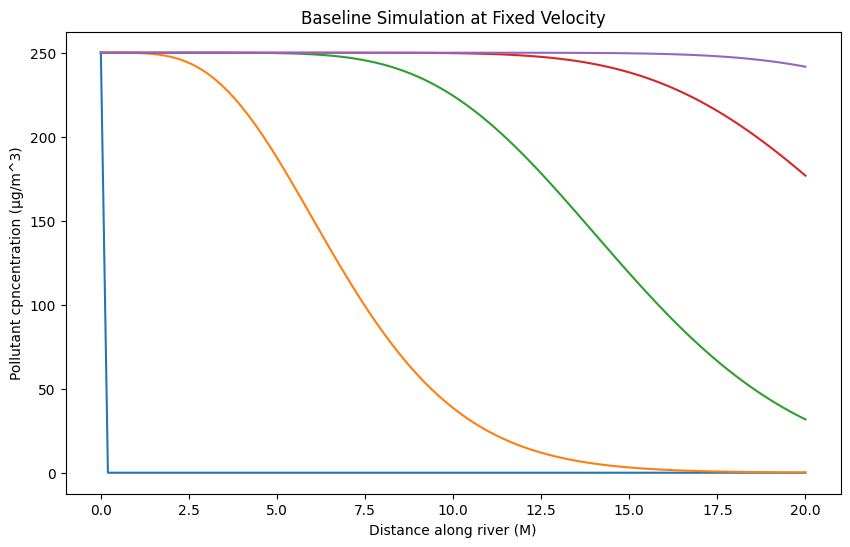

In [59]:

#Plot concentration vs x
import matplotlib.pyplot as plt
time_plots = [0, N_t // 4, N_t // 2, N_t * 3 // 4, N_t - 1]
plot_times = t_array[time_plots]

plt.figure(figsize=(10, 6))
plt.title("Baseline Simulation at Fixed Velocity")
plt.xlabel("Distance along river (M)")
plt.ylabel("Pollutant cpncentration (µg/m^3)")

for i, n in enumerate(time_plots):
  plt.plot(x_array, C_history[n, :])

# Saving the graph into correct folder
RESULTS_FOLDER = "Results"
import os
os.makedirs(RESULTS_FOLDER, exist_ok=True)
plt.savefig(os.path.join(RESULTS_FOLDER, "test1_BaselineSimulationt.png"), dpi=300)
plt.show()